# Notebook permettant d'entrainer nos agents RL

In [1]:
# Installation des paquets nécessaires
#!pip install gym numpy stable-baselines3

## Chargement de l'environnement créé

In [2]:
# Librairies
import gym
import numpy as np
from gym_env_labyrinthe import LabyrinthEnv

In [3]:
# Initialisation de l'environnement
env = LabyrinthEnv(10000) # 1000 steps max (à ajuster)

In [4]:
# Affichage des actions possibles et de l'espace d'observation
print("Espace des actions : ", env.action_space)
print("Espace des observations : ", env.observation_space)

Espace des actions :  Discrete(2352)
Espace des observations :  Box(0.0, 1.0, (245,), float32)


## Création d'un agent random pour tester

In [5]:
#Initialisation de l'environnement
obs, info = env.reset()

# Boucle de jeu avec N tours
N = 100 # Nombre de tours (à ajuster)
for i in range(N):
    action = env.action_space.sample() # Action aléatoire
    obs, recompense, fini, truncated, info = env.step(action)
    env.render()

    if fini:
        print("Partie terminée")
        obs, info = env.reset()

env.close()

## Entrainement de l'agent avec un algo RL

In [6]:
# Importation des librairies
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import CheckpointCallback

In [7]:
#Check si l'environnement est valide
check_env(env)

Cela a permis de corriger la version de Gym utilisée. Il faut utiliser Gymnasium et plus Gym. Les fonctions ont été corrigées en conséquence dans l'environnement.

In [8]:
# Initialisation du modèle
model = DQN("MlpPolicy", 
            env, 
            learning_rate=0.01,
            gamma=0.99,
            exploration_fraction=0.1,
            exploration_final_eps=0.02,
            verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Sauvegarder tous les 10 000 pas
checkpoint_callback = CheckpointCallback(save_freq=10000, save_path='./modeles/',
                                         name_prefix='modele_DQN')

In [10]:
# Entrainement
model.learn(total_timesteps=100000, callback=checkpoint_callback)

Le joueur 1 a gagné la partie !
Le joueur 1 a gagné la partie !
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 7.9e+03   |
|    ep_rew_mean      | -1.74e+04 |
|    exploration_rate | 0.02      |
| time/               |           |
|    episodes         | 4         |
|    fps              | 105       |
|    time_elapsed     | 300       |
|    total_timesteps  | 31609     |
| train/              |           |
|    learning_rate    | 0.01      |
|    loss             | 0.741     |
|    n_updates        | 7877      |
-----------------------------------
Le joueur 1 a gagné la partie !
Le joueur 1 a gagné la partie !
Le joueur 1 a gagné la partie !
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 6.52e+03  |
|    ep_rew_mean      | -1.54e+04 |
|    exploration_rate | 0.02      |
| time/               |           |
|    episodes         | 8         |
|    fps              | 102       |
|    time_el

In [11]:
# Enregistrement du modèle
model.save("modele_DQN_1")

## Evaluation du modele

In [12]:
# Librairies
import matplotlib.pyplot as plt

In [15]:
model_1 = DQN.load("modeles/modele_DQN_10000_steps")
model_2 = DQN.load("modeles/modele_DQN_100000_steps")

In [26]:
# Fonction pour comparer les récompenses des modèles
def tester_modele(modele, env, episodes=1, seed=42):
    recompenses = []

    for episode in range(episodes):
        print(f"Épisode : {episode+1} avec {modele}")
    
        obs, info = env.reset(seed=seed + episode)
        
        fini = False
        total_recompenses = 0

        while not fini:
            action, _ = modele.predict(obs)
            obs, recompense, fini, tronque, info = env.step(action)
            total_recompenses += recompense

        print(f"Récompense : {total_recompenses}")
        recompenses.append(total_recompenses)

    return recompenses

nb_episodes = 10
graine = 42
recompenses_1 = tester_modele(model_1, env, episodes=nb_episodes, seed=graine)
recompenses_2 = tester_modele(model_2, env, episodes=nb_episodes, seed=graine)

env.close()


Épisode : 1 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Récompense : -11305
Épisode : 2 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Récompense : -14857
Épisode : 3 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Le joueur 1 a gagné la partie !
Récompense : -13545
Épisode : 4 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Récompense : -11838
Épisode : 5 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Le joueur 1 a gagné la partie !
Récompense : -14865
Épisode : 6 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Récompense : -14218
Épisode : 7 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Le joueur 1 a gagné la partie !
Récompense : -12531
Épisode : 8 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Récompense : -14387
Épisode : 9 avec <stable_baselines3.dqn.dqn.DQN object at 0x00000114AB8E9310>
Le joueur 1 a gagné la partie !
Récompense

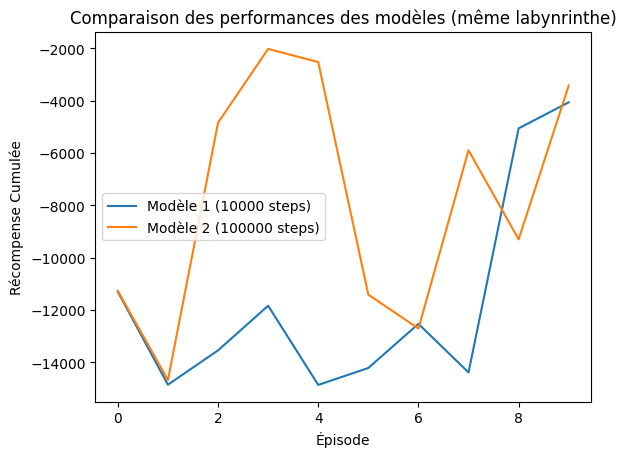

In [29]:
# Afficher les résultats
plt.plot(recompenses_1, label="Modèle 1 (10000 steps)")
plt.plot(recompenses_2, label="Modèle 2 (100000 steps)")
plt.xlabel("Épisode")
plt.ylabel("Récompense Cumulée")
plt.title("Comparaison des performances des modèles (même labynrinthe)")
plt.legend()
plt.show()